In [1]:
import warnings

warnings.filterwarnings('ignore')

# Advanced SVMs on complex and non-linear data​


Support vector machine (SVM) is one of the powerful machine learning algorithms that are used extensively by data scientists and machine learning practitioners. The reason for that is its capability for linear and nonlinear classification and regression. It could be used for different datasets, such as text and images. SVMs are well suited for classification problems with small and medium-sized datasets. The main reason for this is that it has high training complexity, which will require high training time and energy. Therefore, it will be only computationally efficient for a small and medium-sized datasets.



## 1. Linear SVM classification


The basic idea behind the SVM classifier is to fit the widest possible street or margin between the classes. This is known as the large margin classification. Consider the figure below, there are two classes, the main goal of the SVM classifier is to the decision boundary or hyperplane that classifies the data and the support vectors with the largest margin.



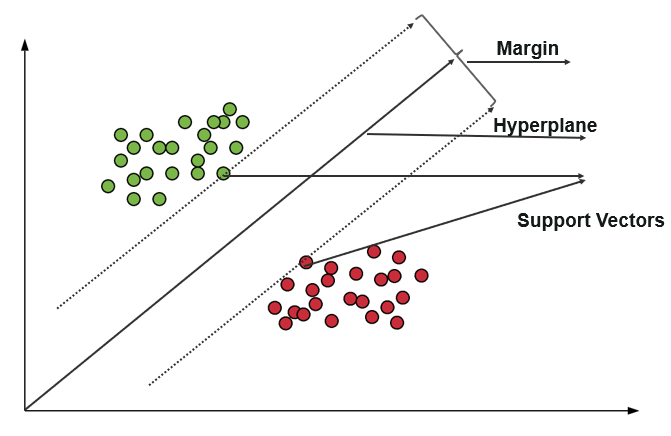

It is important to mention that SVMs classifiers are sensitive to the scale of the features. If the features are not of the same scale, this will lead to the optimization of the margin will be biased toward the largest feature. Therefore it is important to standardize your data before training the model. This can be seen in the figure below when the features have different scales, we can see that the decision boundary and the support vectors are only classifying the X1 features without taking into consideration the X0 feature, however after scaling the data to the same scale the decision boundaries and support vectors are looking much better, and the model is taking into account both features.



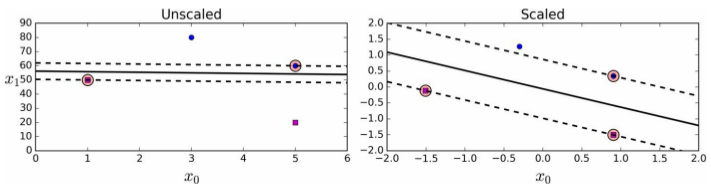

## 1.1. Hard Vs. Soft Margin Classification
There are two types of classification hard and soft classification margins. Hard classification margins are the type of margins in which all the instances must be off the street and on the right side. There are two main problems with hard classification margin:

Only for linearly separable data: If the data is not linearly separable, we will not be able to find a hard margin.
Sensitive to outliers: If the data have outliers, this will affect the margin and make it difficult to find a hard margin between the classes.
To overcome these problems, we use a soft margin classification, in which we try to balance between having the widest street or margin as much as possible and limiting the number of margin violations, such as having instances on the wrong side.



## 1.2. Linear SVM in practice
Let's see how to use SVM in practice, we will use the scikit learn library for this. In the example below, we will first load the iris dataset, scales the features, and then train a linear SVM to detect Iris virginica flowers:



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

Lets first load the dataset 

In [3]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris-Virginica

The following Scikit-Learn code scales the features and then trains a linear SVM model (using the LinearSVC class with C = 1 and the hinge loss function, described shortly) to detect Iris-Virginica flowers. The resulting model is represented in Figure 3.



In [4]:
# defining the scaler and the SVM classifer 

svm_clf = Pipeline([
("scaler", StandardScaler()),
("linear_svc", LinearSVC(C=1, loss="hinge")),
])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

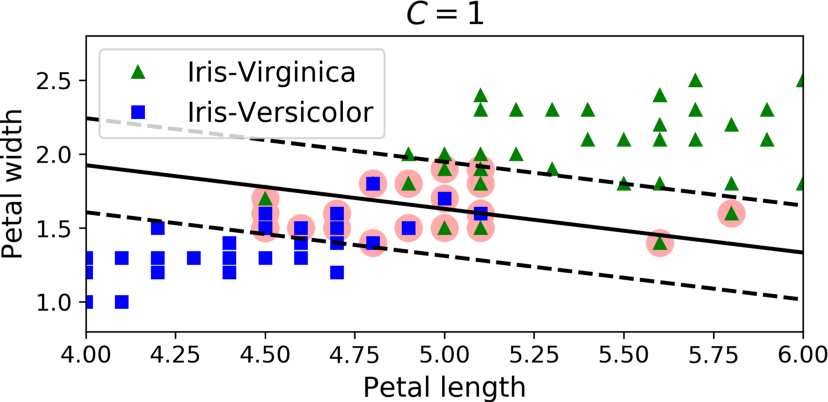

The LinearSVC class regularizes the bias term, so you should center the training set first by subtracting its mean. This is automatic if you scale the data using the StandardScaler, as shown in the code above. Moreover, make sure you set the loss hyperparameter to “hinge”, as it is not the default value. Finally, you should set the dual hyperparameter to False for better performance, unless there are more features than training instances.

You could also use the SVC class, using SVC(kernel=”linear”, C=1), but it will be much slower, especially with large training sets, so it is not recommended. Another option is to use the SGDClassifier class, with SGDClassifier(loss=”hinge”, alpha=1/(m*C)). This applies regular Stochastic Gradient Descent to train a linear SVM classifier. It does not converge as fast as the LinearSVC class, but it can be useful to handle huge datasets that do not fit in memory. Finally, it is important to remember that if your SVM model is overfitting, you can try regularizing it by reducing C.

In [5]:
y_predicted = svm_clf.predict(X)
print('The predicted lables: ', y_predicted)

The predicted lables:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


## 2. Non-Linear SVM Classification ##

Although linear SVM classifiers are efficient and work surprisingly well in many cases, many datasets are not close to being linearly separable. One approach to handling nonlinearly separable datasets is to add more features, such as polynomial features in some cases, this can result in a linearly separable dataset. Consider the left plot in Figure 4: it represents a simple dataset with just one feature x1. This dataset is not linearly separable, as you can see. But if you add a second feature x2 = (x1)2, the resulting 2D dataset is perfectly linearly separable.



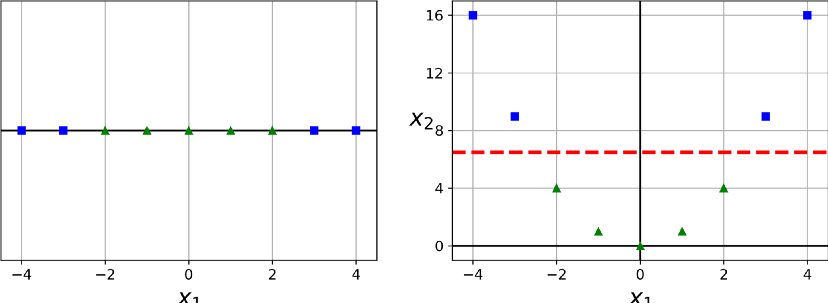

To implement this idea using Scikit-Learn, you can create a Pipeline containing a **PolynomialFeatures** transformer to create polynomial features of the Iris dataset then, it will be followed by a **StandardScaler** and a **LinearSVC**. Let’s test this on the moons dataset: this is a toy dataset for binary classification in which the data points are shaped as two interleaving half circles, as shown in figure 5. The code below will generate the moon dataset, create polynomial features, scale it, train linear SVM on it, and then plot the decision boundaries.



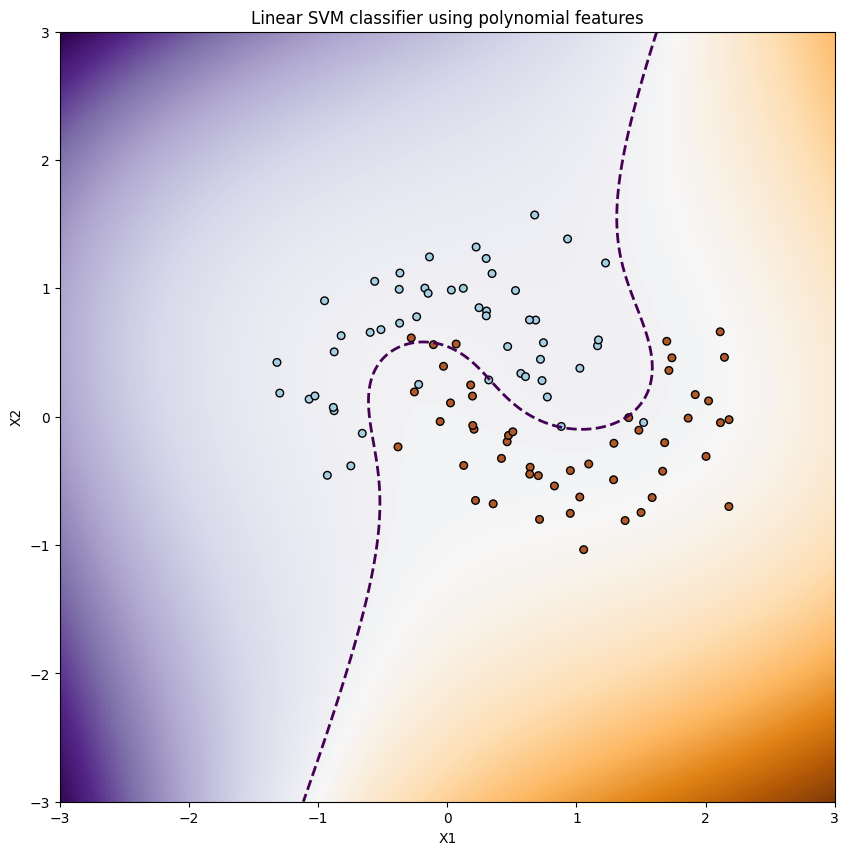

In [6]:
# create moon data using make_moons function 
X, y =  make_moons(noise=0.3, random_state=0)

xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
np.random.seed(0)

# Create sklearn pipeline that first create polynomial features 
#then scale them and create linearSVM classifer
clf = Pipeline([
("poly_features", PolynomialFeatures(degree=3)),
("scaler", StandardScaler()),
("svm_clf", LinearSVC(C=10, loss="hinge"))
])

clf.fit(X, y)

"""
# fit the model
clf = svm.SVC(kernel='linear')
clf.fit(X, y)
"""

# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.PuOr_r,
)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linestyles="dashed")
plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired, edgecolors="k")
plt.axis([-3, 3, -3, 3])
plt.title('Linear SVM classifier using polynomial features')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### 2.1. Polynomial Kernel 

Adding polynomial features as in the previous example is simple to implement and can work great with all sorts of Machine Learning algorithms (not just SVMs), but at a low polynomial degree, cannot deal with very complex datasets, and with a high polynomial degree it creates a huge number of features, making the model too slow.

Fortunately, when using SVMs, you can apply an almost miraculous mathematical technique called the kernel trick, which be explained shortly. It makes it possible to get the same result as if you added many polynomial features, even with very high degrees of polynomials, without actually having to add them. Therefore there will be no increase in the number of features since we don’t actually add any features. This trick is implemented by the SVC class. Let’s test it on the moons dataset:



In [7]:
# plot the decision function for each datapoint on the grid
def decision_boundary_plotting(xx, yy,poly_kernel_svm_clf ,title):
    Z = poly_kernel_svm_clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10,10))
    plt.imshow(
        Z,
        interpolation="nearest",
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        aspect="auto",
        origin="lower",
        cmap=plt.cm.PuOr_r,
    )

    contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linestyles="dashed")
    plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired, edgecolors="k")
    plt.axis([-3, 3, -3, 3])
    plt.title(title)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

This code trains an SVM classifier using a 3rd-degree polynomial kernel. It is represented in Figure 6, which is plotted using the function below:



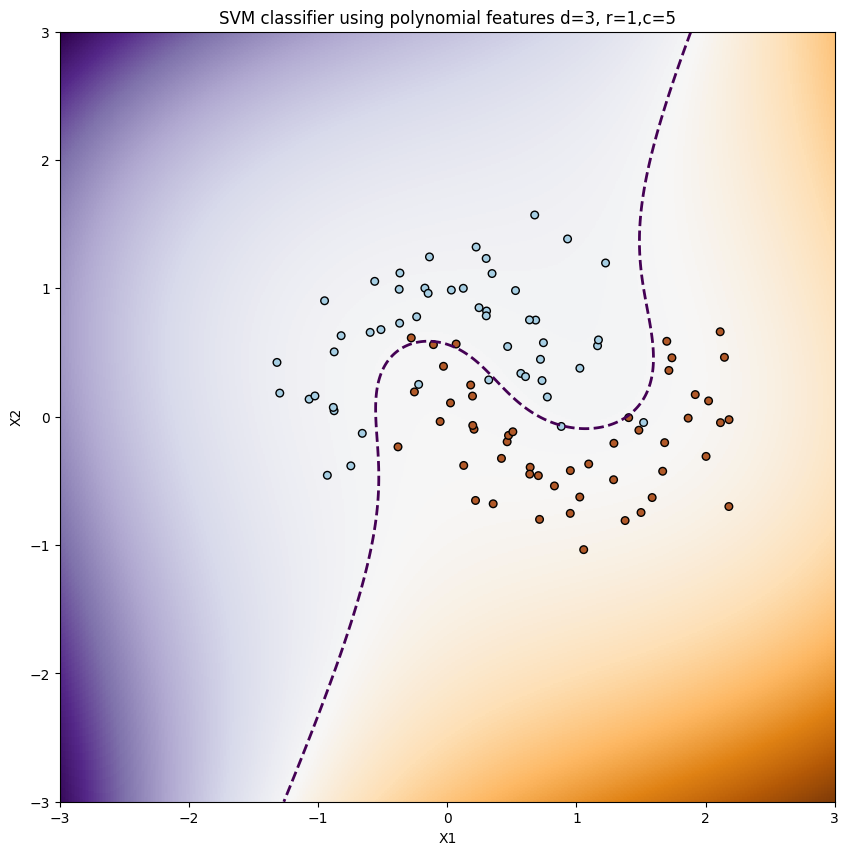

In [8]:
from sklearn.svm import SVC
X, y =  make_moons(noise=0.3, random_state=0)

xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
np.random.seed(0)

poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)
decision_boundary_plotting(xx, yy,poly_kernel_svm_clf ,'SVM classifier using polynomial features d=3, r=1,c=5')

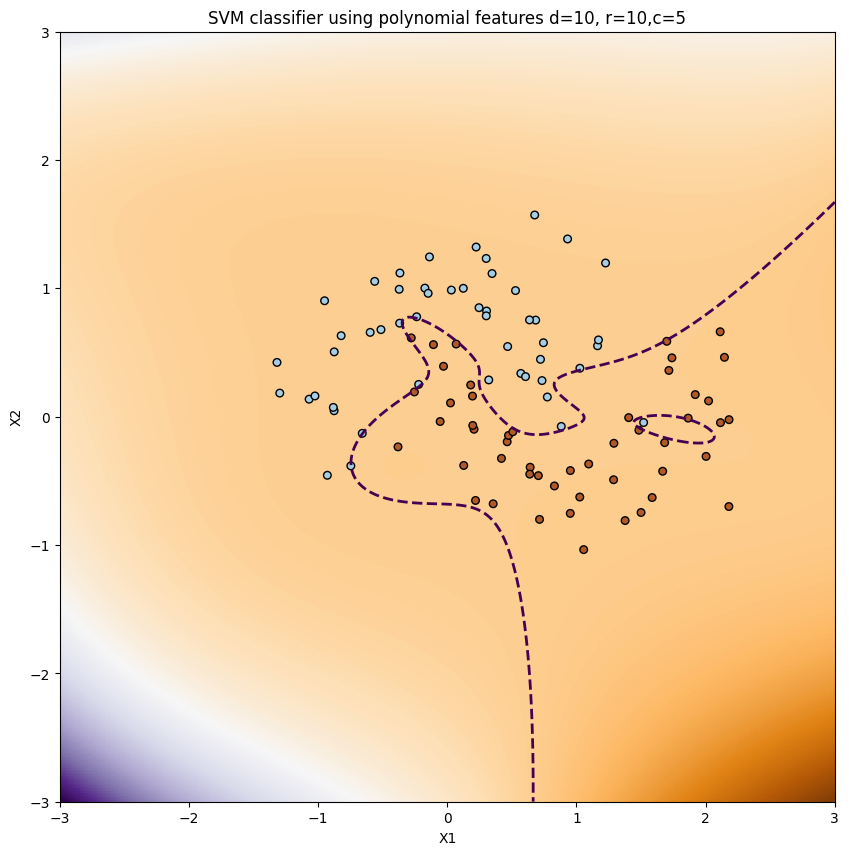

In [9]:
from sklearn.svm import SVC
X, y =  make_moons(noise=0.3, random_state=0)

xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
np.random.seed(0)

poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=10, coef0=10, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)
decision_boundary_plotting(xx, yy,poly_kernel_svm_clf ,'SVM classifier using polynomial features d=10, r=10,c=5')

Obviously, if your model is overfitting, you might want to reduce the polynomial degree. Conversely, if it is underfitting, you can try increasing it. The hyperparameter **coef0** controls how much the model is influenced by high-degree polynomials versus low-degree polynomials. 
A common approach to finding the right hyperparameter values is to use a grid search. It is often faster to first do a very coarse grid search, and then a finer grid search around the best values found. Having a good sense of what each hyperparameter actually does can help you search for the right part of the hyperparameter space. Here are some suggested steps:
The steps are:
1. Define a grid of values to try for each hyperparameter. For example, C = [0.1, 1, 10], gamma = [0.01, 0.1, 1].
2. Train an SVM model with every combination of these values. For 2 hyperparameters, this creates a grid of models.
3. Evaluate each trained model on a validation set. Record model accuracy/loss.
4. The combination of hyperparameters that gave the best validation performance is selected as the optimal set of hyperparameter values.
5. Refit the SVM on all data using these optimal hyperparameters.

## 2.2. Similarity Features 

Another technique to tackle nonlinear problems is to add features computed using a similarity function that measures how much each instance resembles a particular landmark.

We can help the SVM learn complex patterns by adding features that measure how similar each data point is to typical "landmark" cases from each class. For example, we compute the cosine similarity of every point to the mean of each class. This gives a feature indicating resemblance to class A, another for class B, etc.  Points close to a class landmark will have a high similarity score for that class. These similarity features provide extra guidance to the SVM about the shape of neighborhoods belonging to each class. The SVM can then combine this information with its maximum margin training to learn a flexible decision boundary that separates regions of high similarity to different landmarks. This allows the SVM to effectively learn complex non-linear relationships for classification and regression.

You may wonder how to select landmarks. The simplest approach is to create a landmark at the location of each and every instance in the dataset. This creates many dimensions and thus increases the chances that the transformed training set will be linearly separable. The downside is that a training set with m instances and n features gets transformed into a training set with m instances and m features (assuming you drop the original features). If your training set is very large, you end up with an equally large number of features.

### 2.3. Gaussian RBF kernel

Just like the polynomial features method, the similarity features method can be useful with any Machine Learning algorithm, but it may be computationally expensive to compute all the additional features, especially on large training sets. However, once again, the kernel trick does its SVM magic: it makes it possible to obtain a similar result as if you had added many similar features without actually having to add them.



Let’s try the Gaussian RBF kernel using the SVC class:

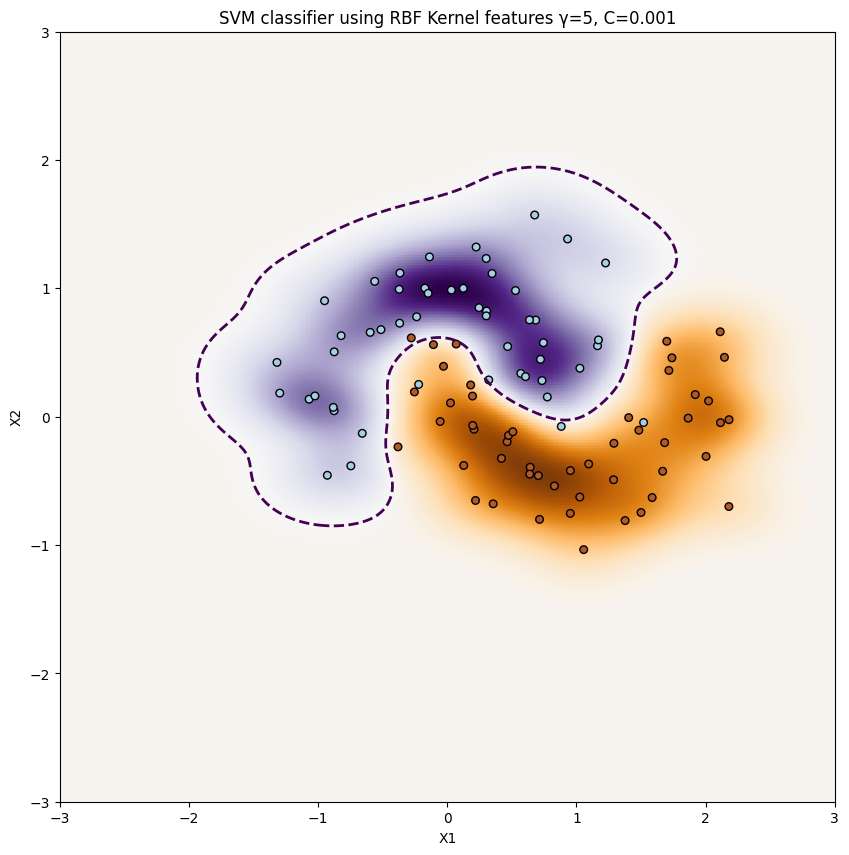

In [10]:
from sklearn.svm import SVC
X, y =  make_moons(noise=0.3, random_state=0)

xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
np.random.seed(0)

rbf_kernel_svm_clf = Pipeline([
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])
rbf_kernel_svm_clf.fit(X, y)
decision_boundary_plotting(xx, yy,rbf_kernel_svm_clf ,'SVM classifier using RBF Kernel features γ=5, C=0.001')


We can also try to train the model with other values for the hyperparameters gamma(γ), and C. Let's first increase C to 1000 and leave γ = 5 as before. The output of this model is shown in Figure 10.



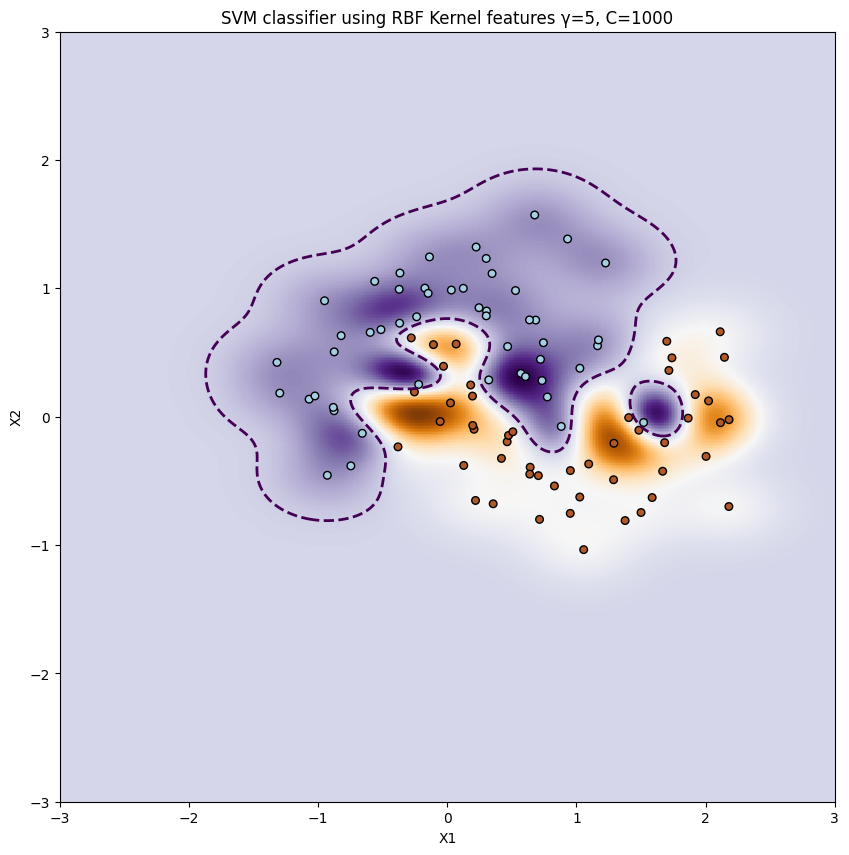

In [11]:
from sklearn.svm import SVC
X, y =  make_moons(noise=0.3, random_state=0)

xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
np.random.seed(0)

rbf_kernel_svm_clf = Pipeline([
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="rbf", gamma=5, C=1000))
])
rbf_kernel_svm_clf.fit(X, y)
decision_boundary_plotting(xx, yy,rbf_kernel_svm_clf ,'SVM classifier using RBF Kernel features γ=5, C=1000')

Now lets decrease γ to 0.1 and try with both C = 0.001 and C =1000 . The result is shown in Figures 11 and 12:



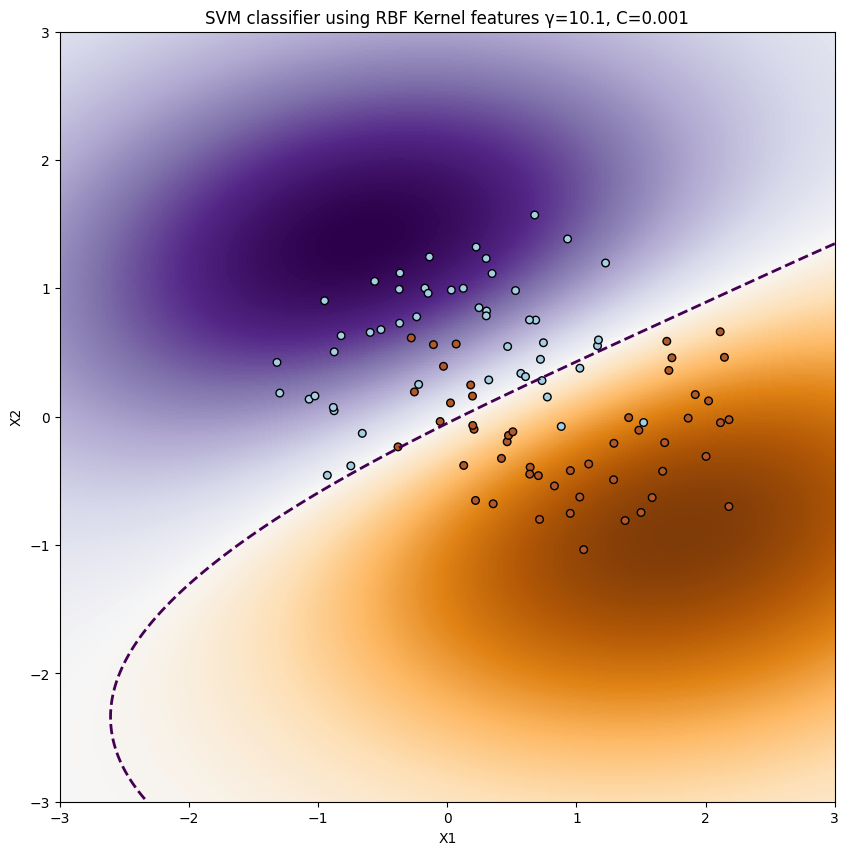

In [12]:
from sklearn.svm import SVC
X, y =  make_moons(noise=0.3, random_state=0)

xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
np.random.seed(0)

rbf_kernel_svm_clf = Pipeline([
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="rbf", gamma=0.1, C=0.001))
])
rbf_kernel_svm_clf.fit(X, y)
decision_boundary_plotting(xx, yy,rbf_kernel_svm_clf ,'SVM classifier using RBF Kernel features γ=10.1, C=0.001')

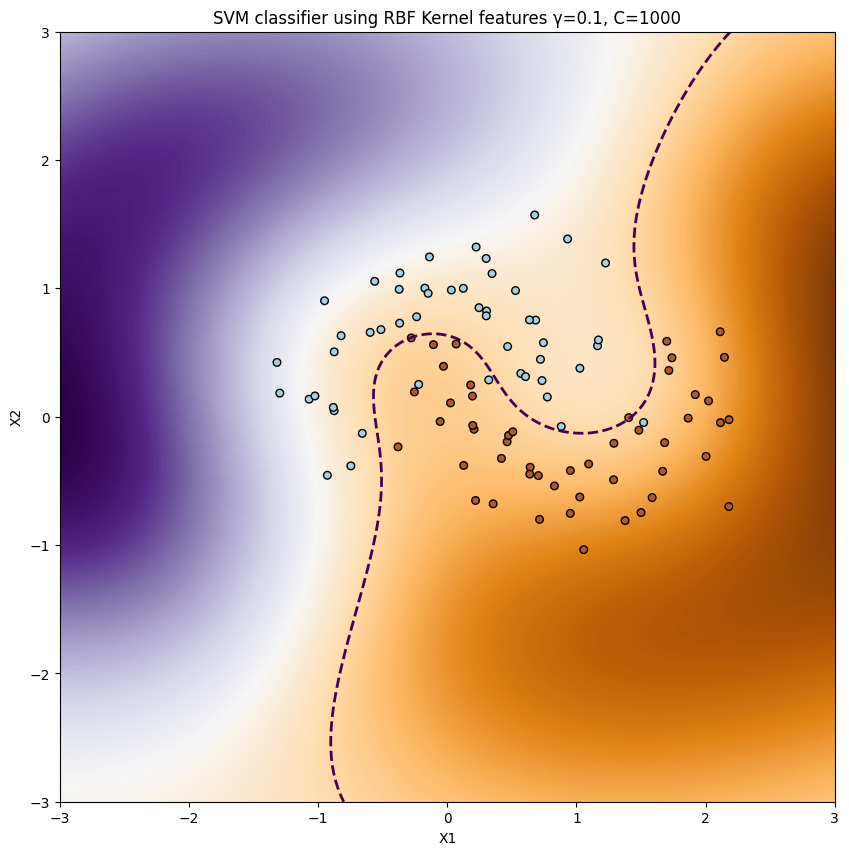

In [13]:
from sklearn.svm import SVC
X, y =  make_moons(noise=0.3, random_state=0)

xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
np.random.seed(0)

rbf_kernel_svm_clf = Pipeline([
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="rbf", gamma=0.1, C=1000))
])
rbf_kernel_svm_clf.fit(X, y)
decision_boundary_plotting(xx, yy,rbf_kernel_svm_clf ,'SVM classifier using RBF Kernel features γ=0.1, C=1000')

Increasing gamma makes the bell-shaped curve narrower (see the left plot of Figure 8), and as a result, each instance’s range of influence is smaller: the decision boundary ends up being more irregular, wiggling around individual instances (figures 9,10). Conversely, a small gamma value makes the bell-shaped curve wider, so instances have a larger range of influence, and the decision boundary ends up smoother (figures 11, 12). So γ acts like a regularization hyperparameter: if your model is overfitting, you should reduce it, and if it is underfitting, you should increase it (similar to the C hyperparameter).



Other kernels exist but are used much more rarely. For example, some kernels are specialized for specific data structures. String kernels are sometimes used when classifying text documents or DNA sequences (e.g., using the string subsequence kernel or kernels based on the Levenshtein distance).



With so many kernels to choose from, how can you decide which one to use? As a rule of thumb, you should always try the linear kernel first (remember that LinearSVC is much faster than SVC(kernel=”linear”) in sklearn), especially if the training set is very large or if it has plenty of features. If the training set is not too large, you should also try the Gaussian RBF kernel; it works well in most cases. Then if you have spare time and computing power, you can also experiment with a few other kernels using cross-validation and grid search, especially if there are kernels specialized for your training set’s data structure.

## 2.4. Computational complexity
The LinearSVC class is based on the liblinear library, which implements an optimized algorithm for linear SVMs. It does not support the kernel trick, but it scales almost linearly with the number of training instances and the number of features: its training time complexity is roughly O(m × n). The algorithm takes longer if you require very high precision. This is controlled by the tolerance hyperparameter ϵ (called tol in Scikit-Learn). In most classification tasks, the default tolerance is fine.

The SVC class is based on the libsvm library, which implements an algorithm that supports the kernel trick. The training time complexity is usually between O(m2 × n) and O(m3 × n). Unfortunately, this means that it gets very slow when the number of training instances gets large (e.g., hundreds of thousands of instances). This algorithm is perfect for complex but small or medium training sets. However, it scales well with the number of features, especially with sparse features (i.e., when each instance has few nonzero features). In this case, the algorithm scales roughly with the average number of nonzero features per instance.



## 3. Regression - Target variable is contiuous

The SVM algorithm is quite versatile: not only does it support linear and nonlinear classification, but it also supports linear and nonlinear regression. The trick is to reverse the objective: instead of trying to fit the largest possible street between two classes while limiting margin violations, SVM Regression tries to fit as many instances as possible on the street while limiting margin violations (i.e., instances off the street). The width of the street is controlled by a hyperparameter ϵ.



Let's first create random data:

In [10]:
from sklearn.svm import LinearSVR
# Lets first create random data
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

Then let's train two SVM classifiers one with ϵ =1.5 and ϵ =0.5:

In [11]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42) # svm with ϵ = 1.5
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42) # svm with ϵ = 0.5
svm_reg1.fit(X, y) # fitting SVM 1
svm_reg2.fit(X, y) # fitting SVM 2

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

Finally, let's plot the two linear SVM Regression models trained on the random linear data, one with a large margin (ϵ = 1.5) and the other with a small margin (ϵ =0.5).


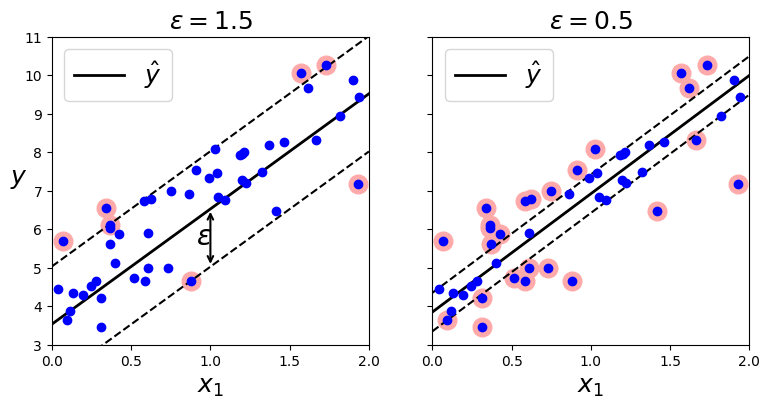

In [12]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )

plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
plt.show()

Adding more training instances within the margin does not affect the model’s predictions; thus, the model is said to be ϵ-insensitive. You can use Scikit-Learn’s LinearSVR class to perform linear SVM Regression.

To tackle nonlinear regression tasks, you can use a kernelized SVM model. In the code below first, we will generate a random quadratic training set:



In [13]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

Then we will train an SVM regressor using a 2nd-degree polynomial kernel using different values of the C-value.



In [14]:
from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="scale")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, degree=2, kernel='poly')

Then we will plot the plot for the two models using the code below:

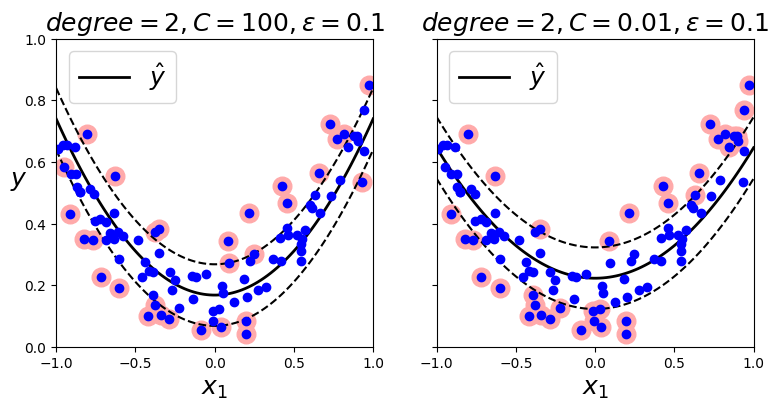

In [15]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
plt.show()

As we can see, there is little regularization on the left plot (the model with a large C value) and much more regularization on the right plot (the model with a small C value).

We can generate the same model in figure 14 using Scikit-Learn’s SVR class (which supports the kernel trick). The SVR class is the regression equivalent of the SVC class, and the LinearSVR class is the regression equivalent of the LinearSVC class. The LinearSVR class scales linearly with the size of the training set (just like the LinearSVC class), while the SVR class gets much too slow when the training set grows large (just like the SVC class).



Text(0.5, 1.0, '$degree=2, C=0.01, \\epsilon = 0.1$')

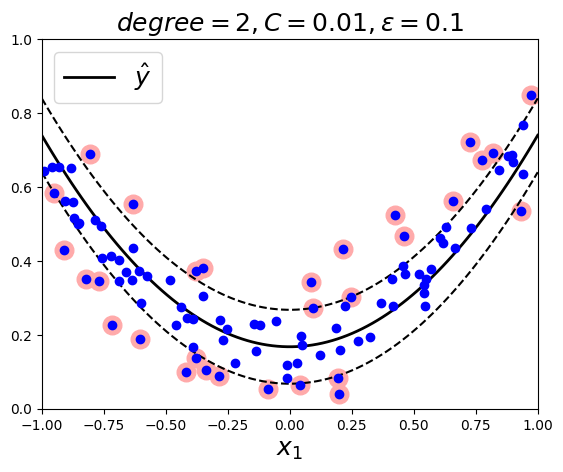

In [16]:
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)
plot_svm_regression(svm_poly_reg, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)

### Back to slides